In [1]:
import numpy as np
import os
import pylab as pl 
import datetime as dt
import pandas as pd
from IPython.display import Image

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# TIME SERIES ANALYSIS

### The goal of this assignment is to find outliers, trends and periodicity in the MTA turnstile data.

**DATA:** MTA subway fares. It is a complete dataset of rides logged by card swipes for 600 Manhattan stations.

The data was organized by Sina Kashuk at NYU Center for Urban Science + Progress. It contains 23 different subway card types (e.g. monthly pass, daily pass, Act for Disability pass…) as follows:

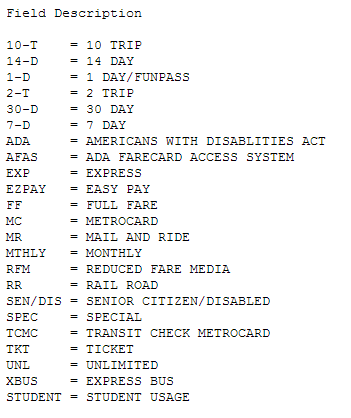

In [2]:
rideTypes = os.getenv('PUIDATA') + '/' + "Ridetypes.png"
Image(rideTypes)

### Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014.

In [3]:
# Load in data using numpy
mtaRides = np.load(os.getenv('PUIDATA') + '/MTA_Fare.npy')

In [4]:
# Stations by card, by week
mtaRides.shape

(600, 23, 194)

### Replace Null Values

In [5]:
# Create an empty array with values stored as floats
data = np.empty(mtaRides.shape, dtype = 'float')

# Convert mtaRides data to float arrays and store them in variable 'data'.
for index, arr in enumerate(mtaRides):
    data[index] = arr.astype('float')

In [6]:
# Replace all -1 values with NaN.
for arr in data:
    arr[arr == -1] = np.nan

In [7]:
mtaRides[0]

array([[56961, 64703, 68002, ..., 36527, 33929, 36824],
       [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
       [  203,   276,   245, ...,   186,   167,   167],
       ..., 
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [   -1,    -1,    -1, ...,  1121,  1377,   712]], dtype=int32)

In [8]:
data[0]

array([[ 56961.,  64703.,  68002., ...,  36527.,  33929.,  36824.],
       [  1732.,   2083.,   2107., ...,   1264.,   1172.,   1238.],
       [   203.,    276.,    245., ...,    186.,    167.,    167.],
       ..., 
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [    nan,     nan,     nan, ...,   1121.,   1377.,    712.]])

## Task 1: 
**Event detection:** Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.

Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [34]:
# Collapsing the card types & stations
sum_cards = np.nansum(data, axis = 1)
sum_stations = np.nansum(sum_cards, axis = 0)

# Figure out where there is the least ridership in a week 
np.argmin(sum_stations, axis=0)

print ('The index for the week with minimal ridership is week: ' + str(np.argmin(sum_stations, axis=0)) + '.')

The index for the week with minimal ridership is week: 126.


In [37]:
# Calculate date that is 127 weeks after start date
date = dt.date(2010,5,21) + dt.timedelta(weeks = 127)
print('The date of the event is ' + str(date) + '.')

The date of the event is 2012-10-26.


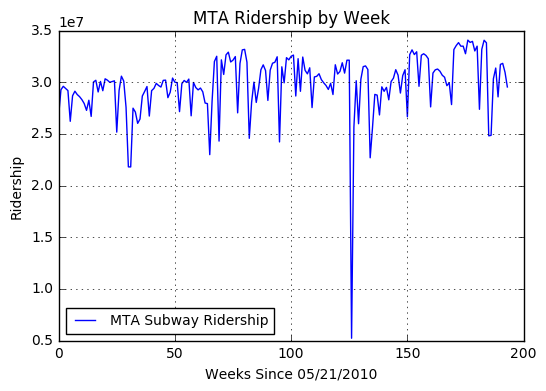

In [71]:
# Plotting x as the range of 194 weeks, y as sum of all rides 
pl.plot(range(194),sum_stations, label = 'MTA Subway Ridership')
pl.xlabel('Weeks Since 05/21/2010')
pl.ylabel('Ridership')
pl.title('MTA Ridership by Week')
pl.grid(True)
pl.legend(loc = 'lower left', fontsize = 10)

Figure 1: The figure above shows the MTA Subway Ridership for 194 weeks beginning on 05/21/2010. During week 127 there is a significant decline in ridership. The event, which occurred on October 26, 2012, has been as a day leading up to Hurricane Sandy. 

## Task 2:
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [12]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [78]:
# Collapsing stations 
sum_cards = np.nansum(data, axis = 0)

card_types = pd.DataFrame(sum_cards)
card_types['F10_Weeks'] = card_types[[0,1,2,3,4,5,6,7,8,9]].sum(axis = 1)
card_types['L10_Weeks'] = card_types[[184,185,186,187,188,189,190,191,192,193]].sum(axis = 1)
card_types['Type'] = ridetype
card_types['Difference'] = card_types['L10_Weeks'] - card_types['F10_Weeks']
card_types['Ratio'] = card_types['L10_Weeks'] / card_types['F10_Weeks']
card_types = card_types[['F10_Weeks','L10_Weeks','Type','Difference','Ratio']]
card_types.sort('Ratio', ascending = False)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,F10_Weeks,L10_Weeks,Type,Difference,Ratio
22,0.0,10685396.0,stud,10685396.0,inf
12,58.0,1437526.0,mr,1437468.0,2.478493e+04
17,4540.0,318628.0,spec,314088.0,7.018238e+01
16,312086.0,907982.0,sen,595896.0,2.909397e+00
15,645160.0,1672874.0,rr,1027714.0,2.592960e+00
21,4762.0,7916.0,xbus,3154.0,1.662327e+00
18,1208606.0,1851912.0,tcmc,643306.0,1.532271e+00
5,39343036.0,54676890.0,7d,15333854.0,1.389748e+00
1,5333762.0,6678217.0,14d,1344455.0,1.252065e+00
11,1318897.0,1600535.0,mc,281638.0,1.213541e+00


Figure 2: The figure above is an exploration of usage of all card types over the first ten weeks and the last ten weeks of the time series. 

According to the table above I am able to infer the following:
Card types (7)ADA Farecard, (8)Express, (9)Easy Pay , (12) Mail and Ride, (17) Special, (21) Express Bus, and (22) Student are complex structures. The aforementioned card types were either phased in or out over the 194 week time frame, I conclude this based on irregularities in their First 10 and Last 10 week usage. 

Ridership types that have steadily increased: (16) Senior, (15) Rail Road, (18) Transit Check, and (5) 7 Day. 

Ridership types that have steadily desreased: (13) Monthly, (14) Reduced Fare Monthly, (20) Unlimited, (6) Americans with Disabilities Act. 

## Task 3:
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [14]:
# Collapsing card types
stations = np.nansum(data, axis = 1)
stations = pd.DataFrame(stations).transpose()
stations.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,126878.0,37306.0,6606.0,16378.0,18564.0,19987.0,12449.0,11091.0,10482.0,147187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149477.0,46464.0,6881.0,17408.0,19903.0,20625.0,13644.0,11659.0,11030.0,154826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152383.0,49359.0,7229.0,17595.0,19948.0,21225.0,13719.0,12037.0,10881.0,155958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,160175.0,44849.0,5731.0,14242.0,16076.0,17412.0,11460.0,9809.0,9123.0,154914.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162641.0,41509.0,7032.0,17589.0,20283.0,20909.0,14094.0,11944.0,10923.0,157628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Append fourier transformation of each column to a list
ft = []
for x in stations.columns:
    ft.append(np.abs(np.fft.rfft(stations[x])))

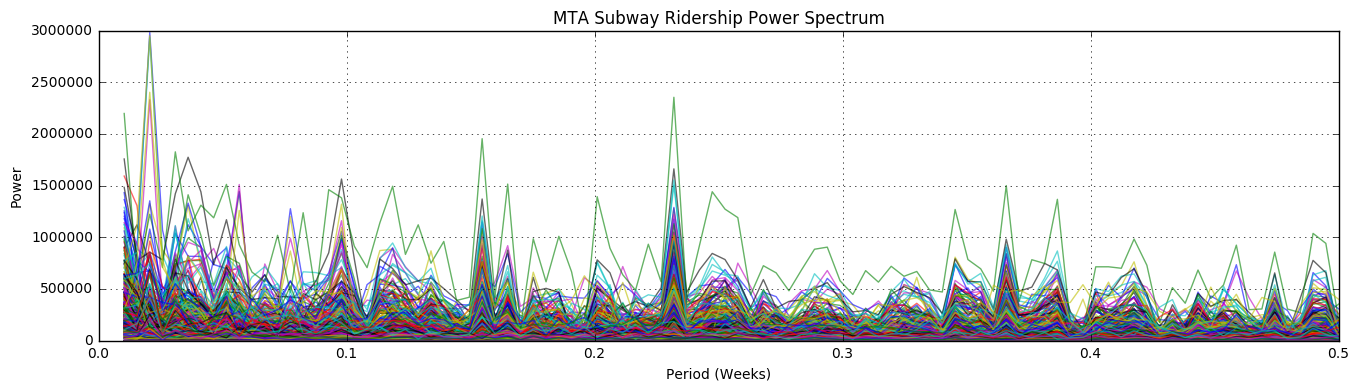

In [79]:
fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (16,4))
for x in ft: 
    ax.plot(np.fft.rfftfreq(194)[2:], x[2:], alpha = 0.6, label = "MTA Ridership")
pl.xlabel('Period (Weeks)')
pl.ylabel('Power')
pl.title('MTA Subway Ridership Power Spectrum')
pl.grid(True)

Figure 3: The figure above shows the power spectrum of each MTA Subway stop for 194 weeks beginning on 05/21/2010. 

In [80]:
# Append annual power values to list
ann = []
for a in ft:
    ann.append(a[4])

In [81]:
# Enumerate annual values from list
enum = []
for tup in enumerate(ann):
    enum.append(tup)

In [82]:
# Sort enumerated list by second value in tuple
enum.sort(key = lambda tup: tup[1], reverse = True)

# Extract top 4 values for annual periodicity
enum[0:4]

[(0, 2980160.6355953491),
 (194, 2950388.929214194),
 (150, 2931895.8769513383),
 (327, 2402218.5809588572)]

**Stations 0, 150, 194, and 327 show an annual periodicity from 05/21/2010 to 02/21/2014.**

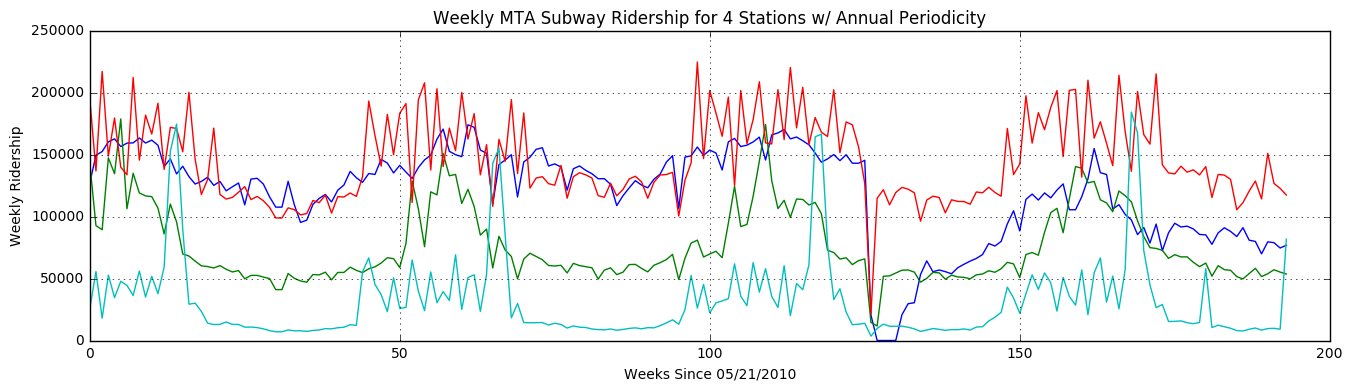

In [83]:
fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (16,4))

for x in [0,150,194,327]:
    ax.plot(range(194), stations[x])
pl.xlabel('Weeks Since 05/21/2010')
pl.ylabel('Weekly Ridership')
pl.title('Weekly MTA Subway Ridership for 4 Stations w/ Annual Periodicity')
pl.grid(True)

Figure 4: The figure above shows the weekly MTA Subway ridership for 4 stations with annual periodicity beginning on 05/21/2010. The annual periodicity is likely seasonal, but the causation is unknown at this time. 